In [29]:
import os
os.environ["OMP_NUM_THREADS"] = "9"

In [30]:
import pandas as pd
import numpy as np

from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

## 1. IMPORT DATASET

In [31]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## 2. EDA

In [32]:
df.describe(include="all")

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [34]:
df.shape

(2240, 29)

In [35]:
#Remove NaN Values
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))
# Change obj => Datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.head()

The total number of data-points after removing the rows with missing values are: 2216


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [36]:
# Categorical
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [37]:
#Change Category 2types: Partner: Married + Together & Alone: The Rest
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
#Change Education Category in 3 types: Undergrate: Basic and 2n Cycle & Gradute: Draduation & Postgraduation: Master + PhD
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [38]:
# Add New Feature
# Calculate Age of customers
current_year = datetime.now().year
df["Age"] = current_year - df["Year_Birth"]

# # Use the last day a customer registered as the reference point
# latest_date = df['Dt_Customer'].max() 

# # Tenure
# df['Customer_Tenure'] = (latest_date - df['Dt_Customer']).dt.days

# # Month/Year Register
# df['Join_Year'] = df['Dt_Customer'].dt.year
# df['Join_Month'] = df['Dt_Customer'].dt.month

# Total Spending for products
spending_columns = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]
df["Total_Spent"] = df[spending_columns].sum(axis=1)

# Total children in home (Kidhome + Teenhome)
df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

# Family Size: Adult Living with + children
living_with_map = {"Alone": 1, "Partner": 2}
df["Family_Size"] = df["Living_With"].map(living_with_map).fillna(1).astype(int) + df["Total_Children"]

# Have Children or not
df["Is_Parent"] = (df["Total_Children"] > 0).astype(int)

# Rename
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Drop col
df.drop(columns=["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], inplace=True)

In [39]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Total_Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,56.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,132.000000,2525.000000,3.000000,5.000000,1.000000


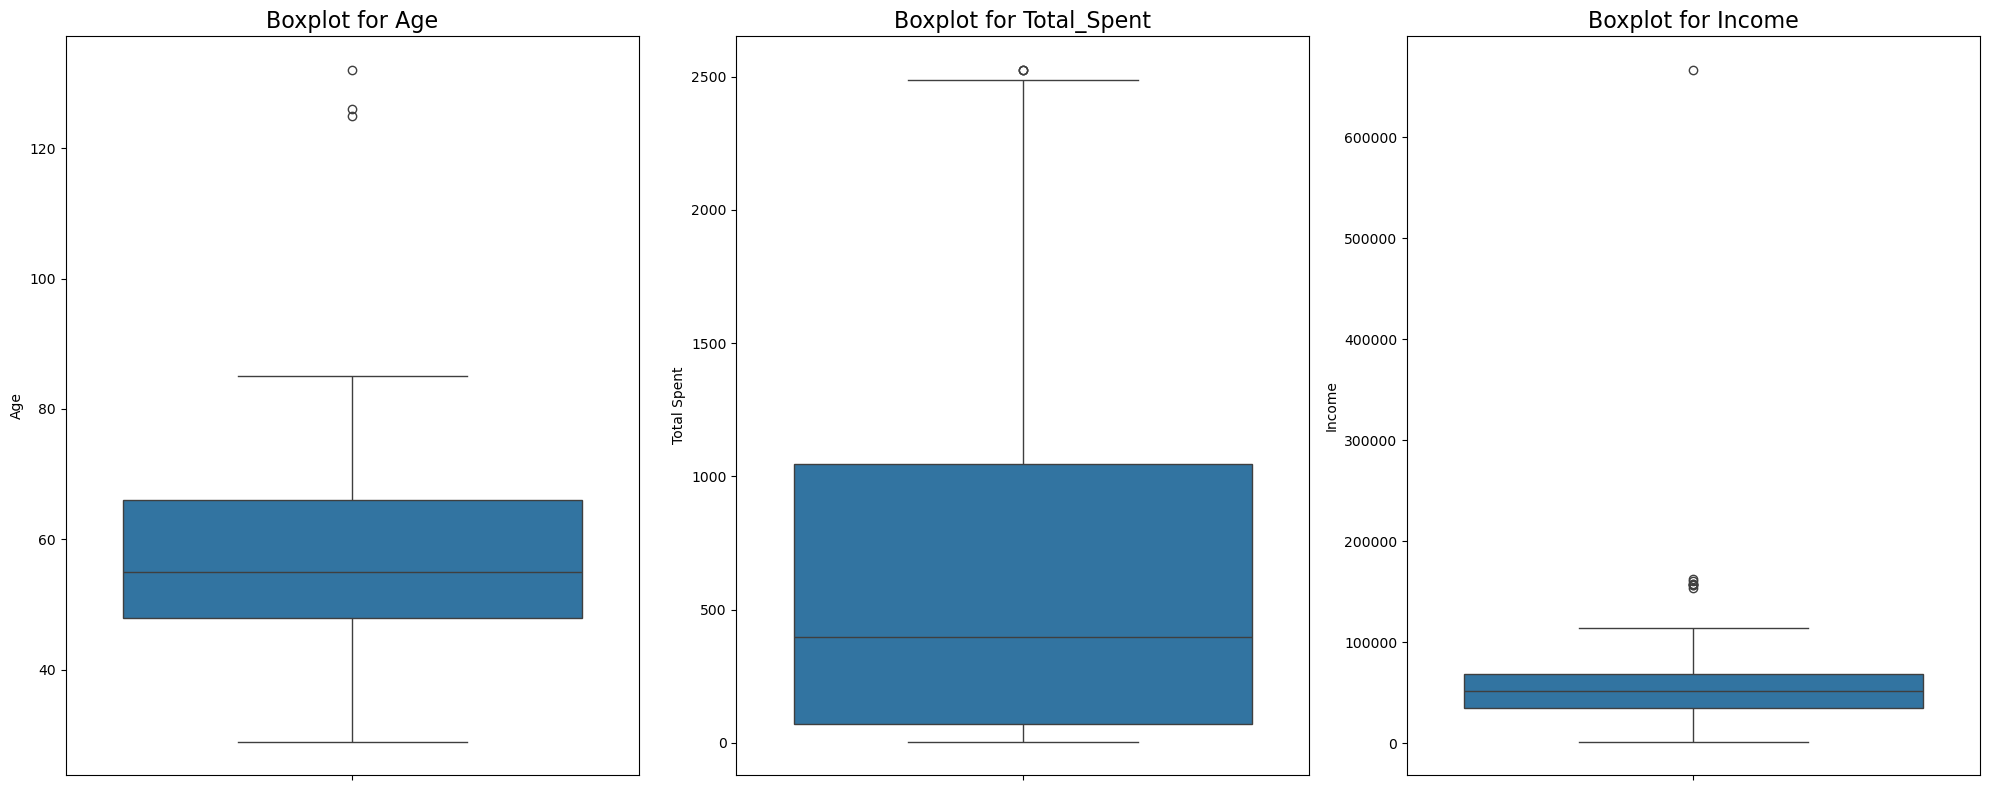

In [40]:
# Outliers Detection
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# 1. 'Age'
sns.boxplot(ax=axes[0], y=df['Age'])
axes[0].set_title('Boxplot for Age', fontsize=16)
axes[0].set_ylabel('Age')

# 2. 'Total_Spent'
sns.boxplot(ax=axes[1], y=df['Total_Spent'])
axes[1].set_title('Boxplot for Total_Spent', fontsize=16)
axes[1].set_ylabel('Total Spent')

# 3.'Income'
if 'Income' in df.columns:
    sns.boxplot(ax=axes[2], y=df['Income'])
    axes[2].set_title('Boxplot for Income', fontsize=16)
    axes[2].set_ylabel('Income')
else:
    axes[2].set_visible(False)

plt.tight_layout()
plt.show()


In [41]:
#Dropping the outliers by setting a cap on Age
df = df[(df["Age"]<110)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


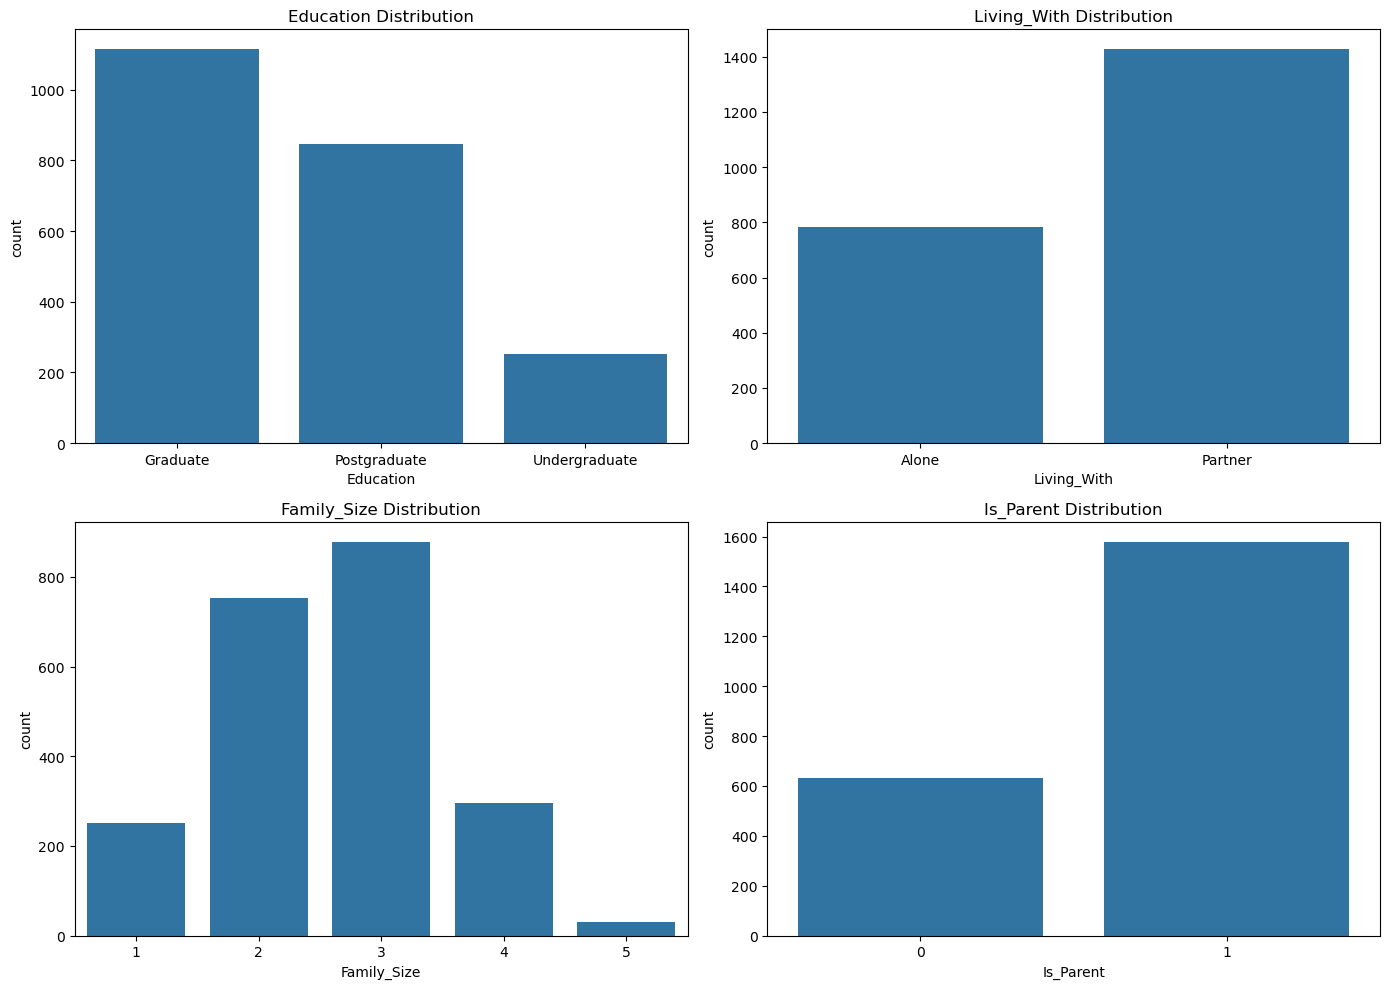

In [42]:
#Univariate Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(data=df, x='Education', ax=axes[0, 0]).set_title('Education Distribution')
sns.countplot(data=df, x='Living_With', ax=axes[0, 1]).set_title('Living_With Distribution')
sns.countplot(data=df, x='Family_Size', ax=axes[1, 0]).set_title('Family_Size Distribution')
sns.countplot(data=df, x='Is_Parent', ax=axes[1, 1]).set_title('Is_Parent Distribution')
plt.tight_layout()
plt.show()

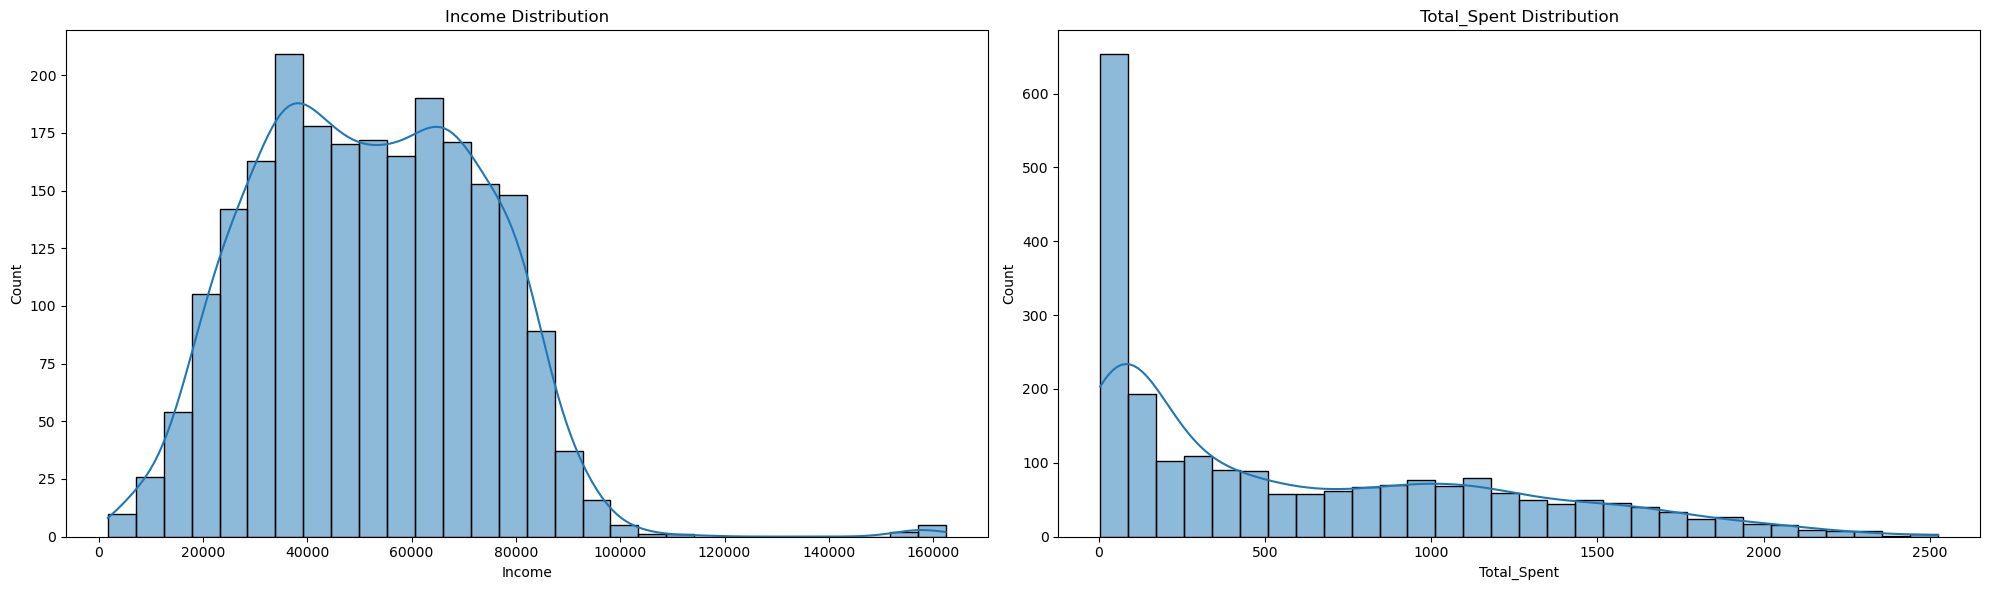

In [43]:
#Univariate Analysis
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(df['Income'], kde=True, ax=axes[0], bins=30).set_title('Income Distribution')
sns.histplot(df['Total_Spent'], kde=True, ax=axes[1], bins=30).set_title('Total_Spent Distribution')
# sns.histplot(df['Customer_Tenure'], kde=True, ax=axes[2], bins=30).set_title('Phân phối Thời gian Gắn bó (ngày)')
plt.tight_layout()
plt.show()

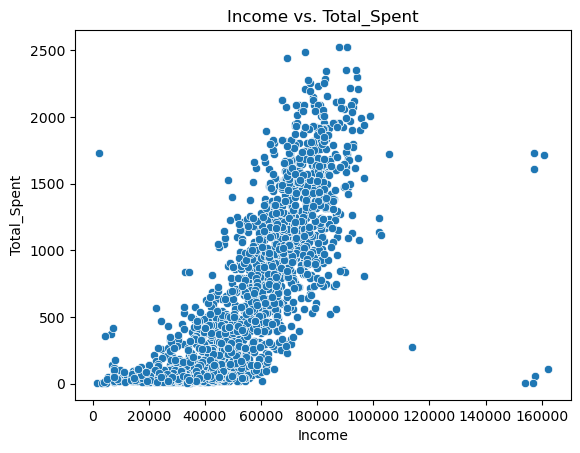

In [44]:
# Multivariate Analysis of Distribution
# How does income affect total spent?
sns.scatterplot(data=df, x='Income', y='Total_Spent')
plt.title('Income vs. Total_Spent')
plt.show()

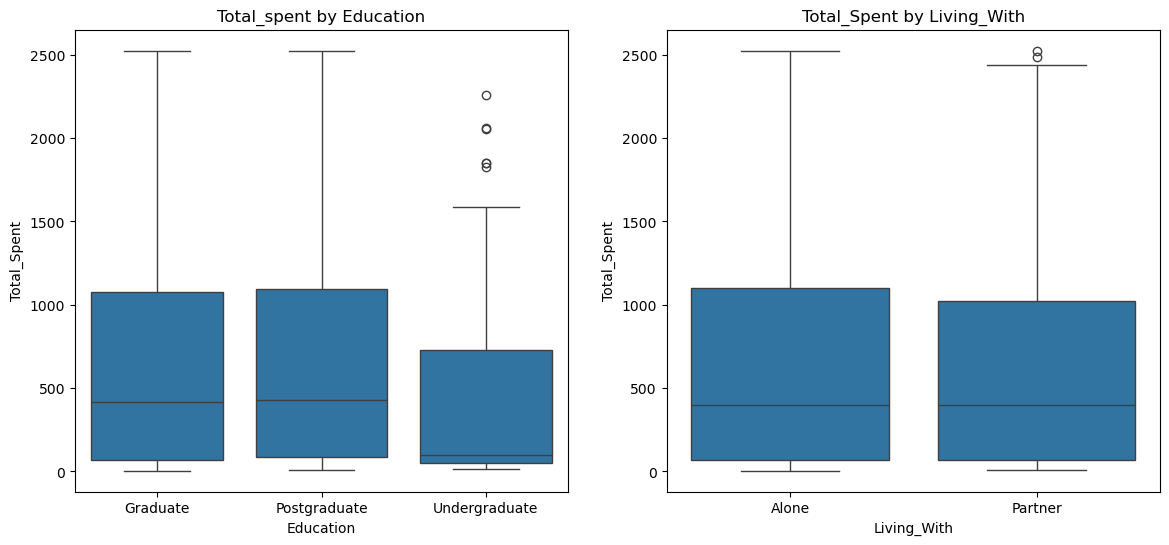

In [45]:
# Multivariate Analysis of Distribution
# Which customer group (by education or family status) spends the most?
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df, x='Education', y='Total_Spent', ax=axes[0])
axes[0].set_title('Total_spent by Education')

sns.boxplot(data=df, x='Living_With', y='Total_Spent', ax=axes[1])
axes[1].set_title('Total_Spent by Living_With')
plt.show()

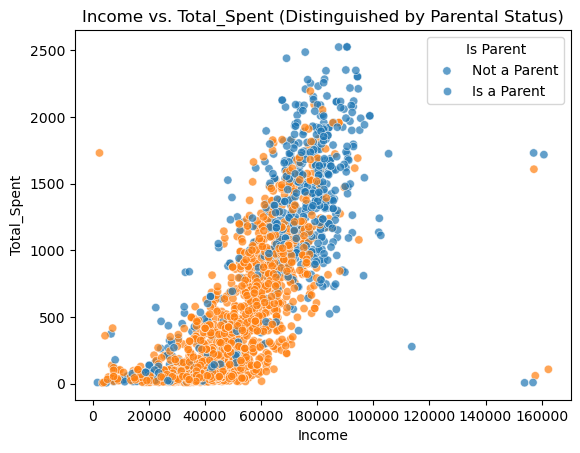

In [46]:
# Multivariate Analysis of Distribution
# How does having children affect spending?
sns.scatterplot(data=df, x='Income', y='Total_Spent', hue='Is_Parent', alpha=0.7)
plt.title('Income vs. Total_Spent (Distinguished by Parental Status)')
plt.legend(title='Is Parent', labels=['Not a Parent', 'Is a Parent'])
plt.show()

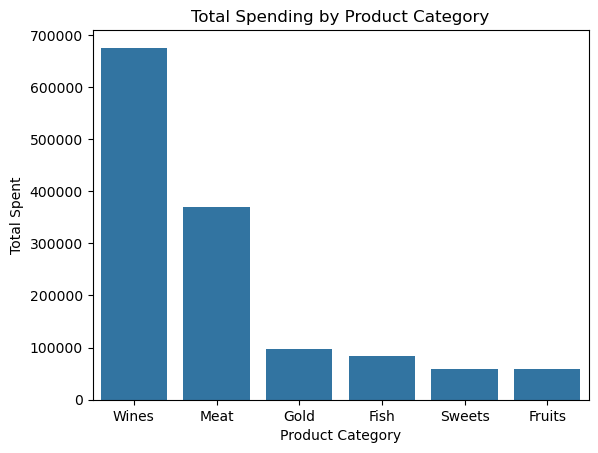

In [47]:
# Calculate total spending for each product
spending_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
product_spending = df[spending_cols].sum().sort_values(ascending=False)

sns.barplot(x=product_spending.index, y=product_spending.values)
plt.title('Total Spending by Product Category')
plt.ylabel('Total Spent')
plt.xlabel('Product Category')
plt.show()

## 3.DATA PREPROCESSING AND MODEL BUILDING

In [48]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [49]:
#encoding for categorical
education_map = {
    "Undergraduate": 0,
    "Graduate": 1,
    "Postgraduate": 2
}
df['Education'] = df['Education'].map(education_map)
df = pd.get_dummies(df, columns=['Living_With'], drop_first=True)

In [50]:
# This is outcome, not feature
cols_to_drop = [
    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
    'AcceptedCmp2', 'Complain', 'Response'
]

ds = df.drop(columns=cols_to_drop).copy()

#initialize Scaler
scaler = StandardScaler()

# Scale data
scaled_ds = pd.DataFrame(
    scaler.fit_transform(ds),
    columns=ds.columns,
    index=ds.index
)

print("All features have been scaled.")

print(scaled_ds.head())



All features have been scaled.
   Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.411675  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.411675 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.411675  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.411675 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   1.123949  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumWebPurchases  NumCatalogPurchases  \
0  1.690293  2.453472  1.483713  ...         1.426865             2.503607   
1 -0.718230 -0.651004 -0.634019  ...        -1.126420            -0.571340   
2 -0.178542  1.339513 -0.147184  ...         1.426865            -0.229679   
3 -0.655787 -0.504911 -0.585335  ...        -0.761665            -0.913000   
4 -0.218684  0.152508 -0.001133  ...         0.332600             0.111982   

   NumStorePurchases  NumWebVisitsMonth    

In [51]:
#Reduce dim
pca = PCA(n_components=0.80)

ds_pca = pca.fit_transform(scaled_ds)

# Create number of super column
num_components = ds_pca.shape[1]
print(f"-> PCA summarize original columns by {num_components} 'super columns'.")

# Change to DataFrame
# Create columns (PC1, PC2, PC3, ...)
pca_columns = [f'PC{i+1}' for i in range(num_components)]

df_pca = pd.DataFrame(
    ds_pca,
    columns=pca_columns,
    index=scaled_ds.index
)

print("\nReduce dimension successfully")
print(df_pca.head())

-> PCA summarize original columns by 8 'super columns'.

Reduce dimension successfully
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  4.908732 -0.537821 -0.447752 -1.908260 -0.478232  0.337322  0.021845   
1 -2.865084  0.131298  0.984101  0.112141 -1.766491 -0.419931 -1.242363   
2  2.597497 -0.780272  0.042294  0.264699  0.642608 -1.346706  1.000206   
3 -2.650425 -1.456924 -1.059308  0.393114  1.006973 -0.428073 -0.317527   
4 -0.600206  0.438491 -0.988627  0.304852  0.901991  2.130683 -0.199849   

        PC8  
0  2.554895  
1  0.509243  
2 -0.200763  
3 -0.428686  
4  0.246557  


In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import matplotlib.pyplot as plt

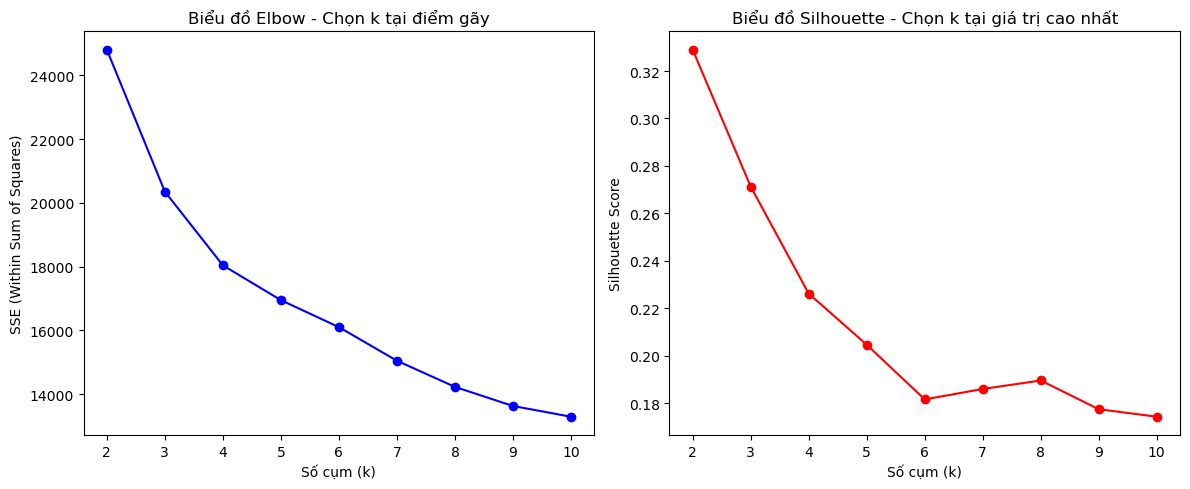

In [53]:
# Tìm k tối ưu bằng Elbow và Silhouette
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(ds_pca)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(ds_pca, kmeans.labels_))

# Vẽ biểu đồ Elbow
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, sse, 'bo-')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE (Within Sum of Squares)')
plt.title('Biểu đồ Elbow - Chọn k tại điểm gãy')

# Vẽ biểu đồ Silhouette
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.title('Biểu đồ Silhouette - Chọn k tại giá trị cao nhất')

plt.tight_layout()
plt.show()


Giá trị trung bình các đặc trưng trong từng cụm:
         Education        Income   Kidhome  Teenhome    Recency       Wines  \
Cluster                                                                       
0         1.285992  76126.809339  0.015564  0.038911  49.459144  604.815175   
1         1.386719  42579.357422  0.820312  1.017578  49.421875   77.537109   
2         1.351211  61526.967128  0.171280  0.955017  48.449827  523.136678   
3         1.074013  30329.754934  0.740132  0.042763  48.850329   36.758224   

            Fruits        Meat       Fish     Sweets  ...  AcceptedCmp1  \
Cluster                                               ...                 
0        65.772374  469.863813  96.560311  67.498054  ...      0.214008   
1         4.082031   28.470703   5.734375   3.998047  ...      0.003906   
2        31.628028  167.648789  42.179931  32.648789  ...      0.050173   
3         6.682566   27.108553  10.412829   6.932566  ...      0.001645   

         AcceptedCmp2  C

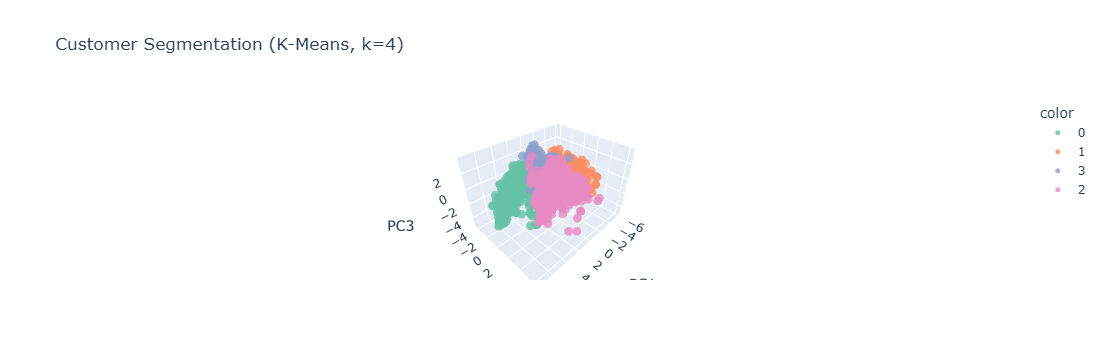

In [58]:
optimal_k = 4 
# Áp dụng KMeans với k tối ưu
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(ds_pca)

# Giảm còn 3 thành phần PCA để vẽ 3D
pca_3d = PCA(n_components=3)
ds_pca_3d = pca_3d.fit_transform(scaled_ds)

# Tạo DataFrame cho biểu đồ
pca_df = pd.DataFrame(ds_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = cluster_labels

# Gắn nhãn cụm vào dữ liệu gốc
df['Cluster'] = cluster_labels

# ---Tính giá trị trung bình của từng đặc trưng trong mỗi cụm ---
print("\nGiá trị trung bình các đặc trưng trong từng cụm:")
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

# Thống kê kích thước cụm
print("\nKích thước từng cụm:")
print(df['Cluster'].value_counts())

# Vẽ biểu đồ 3D bằng Plotly
fig = px.scatter_3d(
    pca_df,
    x='PC1', y='PC2', z='PC3',
    color=pca_df['Cluster'].astype(str),
    title=f'Customer Segmentation (K-Means, k={optimal_k})',
    color_discrete_sequence=px.colors.qualitative.Set2,
    opacity=0.8
)

fig.update_traces(marker=dict(size=5, line=dict(width=0)))
fig.show()

## 4. Build Dashboard using Dash

In [55]:
pip install dash plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [56]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np
import warnings                  
warnings.filterwarnings('ignore')

In [57]:
# --- KHỞI TẠO DỮ LIỆU BAN ĐẦU (Giả định đã có df) ---
# Thêm cột trạng thái trẻ em
df["Kidhome_Status"] = df["Kidhome"].apply(lambda x: "Has Kids" if int(x) >= 1 else "No Kids")
# Lấy min/max Income ban đầu
min_income_init = int(df["Income"].min())
max_income_init = int(df["Income"].max())

# Khởi tạo ứng dụng Dash
app = dash.Dash(__name__)

# --- BƯỚC 2: THIẾT KẾ GIAO DIỆN (LAYOUT) ĐÃ CHỈNH SỬA ---
app.layout = html.Div([
    # Tiêu đề
    html.H1(" Customer's Information", style={'textAlign': 'center', 'padding-top': '1rem'}),

    # Date Filter (Sidebar được tích hợp vào layout)
    html.Div([
        html.H3("Choose your filter:", style={'color': '#1f77b4'}),

        # 1. Education filter
        html.Label("Filter by Education Level"),
        dcc.Dropdown(
            id='education-filter',
            options=[{'label': i, 'value': i} for i in df['Education'].unique()],
            multi=True,
            value=[]
        ),

        # 2. Kidhome filter
        html.Label("Filter by Kidhome Status", style={'paddingTop': '10px', 'display': 'block'}),
        dcc.Dropdown(
            id='kidhome-filter',
            options=[{'label': i, 'value': i} for i in df['Kidhome_Status'].unique()],
            multi=True,
            value=[]
        ),

        # 3. Income filter (Slider)
        html.Label("Filter by Income Range", style={'paddingTop': '10px', 'display': 'block'}),
        dcc.RangeSlider(
            id='income-slider',
            min=min_income_init,
            max=max_income_init,
            step=1000,
            value=[min_income_init, max_income_init],
            marks={str(i): f'${i/1000}K' for i in range(min_income_init, max_income_init + 1, (max_income_init - min_income_init)//4 or 1)}
        ),
    ], style={'width': '20%', 'float': 'left', 'padding': '20px', 'backgroundColor': '#f9f9f9', 'height': '100vh'}), # Vị trí Sidebar

    # Khu vực Biểu đồ (Main Content)
    html.Div([
        # Hàng 1: Tổng chi tiêu theo Education và Kid Status
        html.Div([
            dcc.Graph(id='spending-by-education-bar', style={'width': '49%', 'display': 'inline-block'}),
            dcc.Graph(id='spending-by-kid-pie', style={'width': '49%', 'display': 'inline-block'}),
        ], style={'display': 'flex', 'justifyContent': 'space-between'}),

        # Hàng 2: Scatter Plot (Đã chuyển lên vị trí này)
        html.H3('Relationship between Income and Total Spending', style={'paddingTop': '20px'}),
        dcc.Graph(id='income-spending-scatter'),

        # Hàng 3: Bảng tóm tắt (Table)
html.H3("Summary of Spending by Product Type", style={'paddingTop': '20px'}),
        html.Div(id='product-spending-summary'),

    ], style={'width': '78%', 'float': 'right', 'padding': '20px'})
])

# --- BƯỚC 3: CALLBACKS (XỬ LÝ TƯƠNG TÁC) ĐÃ CHỈNH SỬA ---

@app.callback(
    [
        Output('spending-by-education-bar', 'figure'),
        Output('spending-by-kid-pie', 'figure'),
        # Đã xóa Output('product-spending-bar', 'figure')
        Output('income-spending-scatter', 'figure'),
        Output('product-spending-summary', 'children')
    ],
    [
        Input('education-filter', 'value'),
        Input('kidhome-filter', 'value'),
        Input('income-slider', 'value')
    ]
)
def update_graphs(selected_education, selected_kidhome, income_range):
    # 1. Lọc dữ liệu
    filtered_df = df.copy()

    if selected_education:
        filtered_df = filtered_df[filtered_df["Education"].isin(selected_education)]

    if selected_kidhome:
        filtered_df = filtered_df[filtered_df["Kidhome_Status"].isin(selected_kidhome)]

    filtered_df = filtered_df[
        (filtered_df["Income"] >= income_range[0]) &
        (filtered_df["Income"] <= income_range[1])
    ].copy()

    # Xử lý trường hợp DataFrame rỗng
    if filtered_df.empty:
        # Trả về figure rỗng và cảnh báo (Đã giảm số lượng trả về)
        empty_fig = {'data': [], 'layout': {'title': 'No data matches the filters '}}
        return empty_fig, empty_fig, empty_fig, html.P("No data to display in the table.") # 4 giá trị trả về

    # Tùy chỉnh màu sắc
    CUSTOM_BLUE_SCALE = [(0.0, '#E1F5FE'), (0.5, '#4FC3F7'), (1.0, '#0277BD')]
    product_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'] # Cần cho bước 6

    # 2. Tạo Biểu đồ 1: Spending by Education (Bar)
    spending_by_edu = filtered_df.groupby(by=["Education"], as_index=False)["Total_Spent"].sum()
    fig_edu_bar = px.bar(spending_by_edu, x="Education", y="Total_Spent",
                          text=[f'${x:,.0f}' for x in spending_by_edu["Total_Spent"]],
                          template="seaborn",
                          title="Total Customer Spending by Education Level",
                          color="Total_Spent",
                          color_continuous_scale=px.colors.sequential.Sunset
                         )
    fig_edu_bar.update_layout(height=400)

    # 3. Tạo Biểu đồ 2: Spending by Kid Status (Pie)
    spending_by_kid = filtered_df.groupby(by=["Kidhome_Status"], as_index=False)["Total_Spent"].sum()
    fig_kid_pie = px.pie(spending_by_kid, values="Total_Spent", names="Kidhome_Status", hole=0.5,
                          title="Proportion of Spending by Kid Status",
                          color="Kidhome_Status",
                          color_discrete_sequence=['#1f77b4', '#ff7f0e']
                         )
    fig_kid_pie.update_traces(textinfo="percent+label", textposition="inside")
    fig_kid_pie.update_layout(height=400)

    # 4. **ĐÃ XÓA** logic tạo fig_product_bar

    # 5. Tạo Biểu đồ 4: Income vs Spending (Scatter)
    fig_scatter = px.scatter(filtered_df, x="Income", y="Total_Spent", size="Total_Children", color="Education",
                              hover_data=['Income', 'Total_Spent'],
                              color_discrete_sequence=CUSTOM_BLUE_SCALE
                             )
    fig_scatter.update_layout(title="Income vs Total Spending (Size by Total Children)")

    # 6. Tạo Bảng Tóm tắt (HTML Table)
    pivot_table = pd.pivot_table(data=filtered_df, values=product_cols, index=["Education"], aggfunc='mean')

    # Chuyển đổi Pandas Style sang HTML cho Dash
    table_html = html.Div([
        html.P("Average Spending by Education and Product Type:"),
        html.Table(
            [
                html.Thead(html.Tr([html.Th(col, style={'border': '1px solid #ddd', 'padding': '8px', 'backgroundColor': '#f2f2f2'}) for col in ['Education'] + pivot_table.columns.tolist()])),
                html.Tbody([
                    html.Tr([
                        html.Td(index, style={'border': '1px solid #ddd', 'padding': '8px'}),
                        *[html.Td(f'${value:,.0f}', style={'border': '1px solid #ddd', 'padding': '8px'}) for value in row]
                    ]) for index, row in pivot_table.iterrows()
                ])
            ],
            style={'borderCollapse': 'collapse', 'width': '100%'}
        )
    ])

    # Trả về 4 giá trị: fig_edu_bar, fig_kid_pie, fig_scatter, table_html
    return fig_edu_bar, fig_kid_pie, fig_scatter, table_html


# --- BƯỚC 4: CHẠY ỨNG DỤNG ---
if __name__ == '__main__':
    # Chạy ứng dụng trên cổng 8050
    app.run(debug=True)